## Matrix Factorization:

What is Matrix? Matrix is a way of writing similar things together to handle and manipulate them as per our requirements easily. In Data Science, it is generally used to store information like weights in an Artificial Neural Network while training various algorithms and feature values of a dataset.  

### Singular Value Decomposition

SVD is used to remove the redundant features present in a data set. Suppose if we have a data set which comprises of 1000 features. Definitely, any real data set with such a large number of features is bound to contain redundancy in features. If we need to run Machine Learning algorithm on this dataset we need to be aware of the fact that redundant feature cause a lot of problems while running Machine Learning algorithms. Also, running ML algorithms on such large dataset results in inefficiency and will require a lot of memory.

***TruncatedSVD*** from **_sklearn_** used to implements a variant of singular value decomposition (SVD) that only computes the ***k*** largest singular values, where ***k*** is a user-specified parameter.

Mathematically, truncated SVD applied to training samples ***X*** produces a low-rank approximation of ***X***. TruncatedSVD is very similar to PCA, but differs in that it works on sample matrices  directly instead of their covariance matrices. When the columnwise (per-feature) means of ***X*** are subtracted from the feature values, truncated SVD on the resulting matrix is equivalent to PCA

In [1]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

X = np.random.random((5, 8))
print("Input Matrix is:")
print(X.round(2))

svd = TruncatedSVD(n_components=3)
svd.fit(X)

print()
print("Decomposed Singular Values are:",svd.singular_values_.round(2))


Input Matrix is:
[[0.43 0.22 0.74 0.02 0.35 0.17 0.93 0.46]
 [0.45 0.13 0.71 0.12 0.81 0.3  0.59 0.61]
 [0.27 0.72 0.51 0.45 0.43 0.08 0.47 0.78]
 [0.15 0.88 0.56 0.46 0.89 0.96 0.57 0.12]
 [0.4  0.36 0.97 0.06 0.21 0.77 0.99 0.83]]

Decomposed Singular Values are: [3.33 1.08 0.71]


### Latent Drichlet Allocation

***Linear Discriminant Analysis (LDA)*** tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

Let us consider Iris dataset for reference: Iris dataset represents 3 kind of Iris flowers _(Setosa, Versicolour and Virginica)_ with 4 attributes: sepal length, sepal width, petal length and petal width.

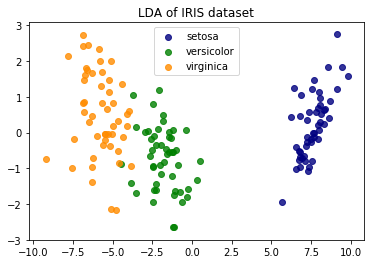

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

lda = LinearDiscriminantAnalysis(n_components=2)
lda_X = lda.fit(X, y).transform(X)

colors = ['navy', 'green', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(lda_X[y == i, 0], lda_X[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

## Feature Selection

Having a good understanding of feature selection/ranking can be a great asset for a data scientist or machine learning practitioner.There are in general two reasons why feature selection is used:
1. Reducing the number of features, to reduce overfitting and improve the generalization of models.
2. To gain a better understanding of the features and their relationship to the response variables.

### Univariate feature selection
Univariate feature selection examines each feature individually to determine the strength of the relationship of the feature with the response variable. Let us consider Iris data once again:

In [3]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest ## for univariate feature selection
from sklearn.feature_selection import chi2 
iris = load_iris()
X, y = iris.data, iris.target
print("Old dataset dimensions are:",X.shape)

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print("New dataset dimensions are:",X_new.shape)

Old dataset dimensions are: (150, 4)
New dataset dimensions are: (150, 2)


## Feature Extraction

### CountVectorizer
Consider a Corpus _C_ of _D_ documents _{d1,d2…..dD}_ and _N_ unique tokens extracted out of the corpus C. The N tokens will form our dictionary and the size of the Count Vector matrix _M_ will be given by ***D X N***. Each row in the matrix _M_ contains the frequency of tokens in document ***D(i)***.

Let us understand this using a simple example of four Documents:

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is about Capillary',
     'This is about tfIdf',
     'This is about sklearn Tutorial',
     "I'm from Gurgaon"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
countDF = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names(),index=['doc1','doc2','doc3','doc4'])
countDF

,about,capillary,from,gurgaon,is,sklearn,tfidf,this,tutorial
doc1,1,1,0,0,1,0,0,1,0
doc2,1,0,0,0,1,0,1,1,0
doc3,1,0,0,0,1,1,0,1,1
doc4,0,0,1,1,0,0,0,0,0


### TfidfVectorizer

This is another method which is based on the frequency method but it is different from count vectorization in the sense that it takes into account not just the occurrence of a word in a single document but in the entire corpus. Common words like ‘is’, ‘the’, ‘a’ etc. tend to appear quite frequently in comparison to the words which are important to a document.Ideally, what we would want is to down weight the common words occurring in almost all documents and give more importance to words that appear in a subset of documents.

***TF = (Number of times term t appears in a document)/(Number of terms in the document)***

***IDF = log(N/n)***, _where, N is the number of documents and n is the number of documents a term t has appeared in._

***TF-IDF = TF X IDF***

Let us consider an example of 4 documents below:


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is about Capillary',
     'This is about tfIdf',
     'This is about Tutorial',
     "I'm from Gurgaon"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tfidfDF = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names(),index=['doc1','doc2','doc3','doc4'])
tfidfDF

,about,capillary,from,gurgaon,is,tfidf,this,tutorial
doc1,0.428175,0.670819,0.000000,0.000000,0.428175,0.000000,0.428175,0.000000
doc2,0.428175,0.000000,0.000000,0.000000,0.428175,0.670819,0.428175,0.000000
doc3,0.428175,0.000000,0.000000,0.000000,0.428175,0.000000,0.428175,0.670819
doc4,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000,0.000000
